In [1]:
from PCA import CustomPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from time import time
from math import sqrt, ceil
from helpers import printm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

TRAIN_SIZE = 50000
LIMIT_COMPONENTS = 30

In [2]:
class Statistics:
  def __init__(self, tr, ts, exp, real):
    self.training_time = tr
    self.testing_time = ts
    self.expected = exp
    self.real = real
  
  def process(self):
    self.abs_err = metrics.mean_absolute_error(self.expected, self.real)
    self.mse_err = metrics.mean_squared_error(self.expected, self.real)
    self.rmse_err = np.sqrt(metrics.mean_squared_error(self.expected, self.real))
    self.accuracy = metrics.accuracy_score(self.expected, self.real)\

  def __str__(self):
    return f"Training time:            |  {self.training_time}\n" +\
           f"Testing time:             |  {self.testing_time}\n" +\
            "="*50 + "\n" +\
           f"Mean Absolute Error:      |  {self.abs_err}\n" +\
           f"Mean Squared Error:       |  {self.mse_err}\n" +\
           f"Root Mean Squared Error:  |  {self.rmse_err}\n" +\
            "="*50 + "\n" +\
           f"Accuracy:                 |  {self.accuracy}"

In [3]:
def forest_bench(train: dict, test: dict):
  clf = RandomForestClassifier()
  training_begin = time()
  clf.fit(train['data'], train['label'])
  training_time = time() - training_begin

  expected = test['label']

  testing_begin = time()
  real = clf.predict(test['data'])
  testing_time = time() - testing_begin

  stat = Statistics(training_time, testing_time, expected, real)
  stat.process()
  print(stat)

In [4]:
def forest_pca_bench(__PCA, label, componens, train, test):
  pca_begin = time()

  pca = __PCA(componens)
  pca.fit(train['data'])

  train_ = { 
        'data':  pca.transform(train['data']),
        'label': train['label']
  }

  test_ = {
        'data':  pca.transform(test['data']),
        'label': test['label']
  }

  pca_time = time() - pca_begin
  clf = RandomForestClassifier()
  training_begin = time()
  clf.fit(train_['data'], train_['label'])
  training_time = time() - training_begin

  expected = test['label']

  testing_begin = time()
  real = clf.predict(test_['data'])
  testing_time = time() - testing_begin

  stat = Statistics(training_time, testing_time, expected, real)
  stat.process()

  return {"abs_err": stat.abs_err, 
          "mse_err": stat.mse_err, 
          "rmse_err": stat.rmse_err, 
          "accuracy": stat.accuracy,
          "pca_time": pca_time,
          "training_time": training_time,
          "testing_time": testing_time,
          "label": label}

In [5]:
def my_plot(cases, arg, x_lbl, y_lbl):
    for case in cases:
        label = case["label"]
        plot_data = filter(lambda x: x["label"] == label, data)
        plt.plot(list(range(1, LIMIT_COMPONENTS+1)), [dt[arg] for dt in plot_data], label=label)
        plt.xlabel(x_lbl)
        plt.ylabel(y_lbl)

    plt.legend()
    plt.show()

In [6]:
mnist = pd.read_csv("data/mnist.csv")
mnist_data, mnist_labels = mnist.drop(["label"], axis=1).values, mnist["label"]

In [7]:
handwritten = pd.read_csv("data/handwritten.csv")
handwritten_data, handwritten_labels = handwritten.drop(["label"], axis=1).values, handwritten["label"]

In [8]:
mnist_train = {
    'data':  mnist_data[:TRAIN_SIZE],
    'label': mnist_labels[:TRAIN_SIZE]
}

mnist_test = {
    'data':  mnist_data[TRAIN_SIZE:],
    'label': mnist_labels[TRAIN_SIZE:]
}

handwritten_test = {
    'data':  handwritten_data,
    'label': handwritten_labels
}

In [9]:
print(f"Train dataset size:       {len(mnist_train['data'])}\n" +\
      f"Test dataset size:        {len(mnist_test['data'])}\n" +\
      f"Rocketbook  dataset size: {len(handwritten_data)}")

Train dataset size:       50000
Test dataset size:        10000
Rocketbook  dataset size: 128


**MNIST** train dataset

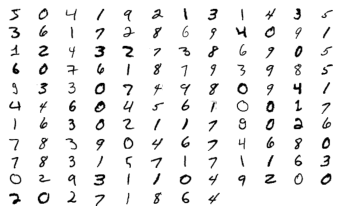

In [10]:
printm(mnist_train['data'][:128])

**MNIST** test dataset

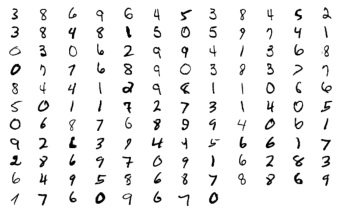

In [11]:
printm(mnist_test['data'][:128])

**Rocketbook** handwritten dataset

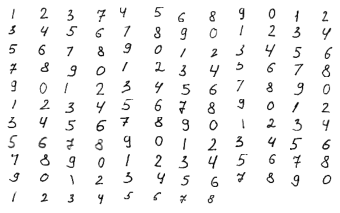

In [12]:
printm(handwritten_test["data"])

In [13]:
test_cases = [{"classifier": CustomPCA, "label": "custom"}, {"classifier": PCA, "label": "default"}]

Testing RandomForest classifier on **MNIST** dataset

In [14]:
forest_bench(mnist_train, mnist_test)

Training time:            |  31.43560290336609
Testing time:             |  0.38881969451904297
Mean Absolute Error:      |  0.1065
Mean Squared Error:       |  0.5207
Root Mean Squared Error:  |  0.7215954545311383
Accuracy:                 |  0.9712


In [15]:
data = [forest_pca_bench(test["classifier"], test["label"], pca_num, mnist_train, mnist_test)
            for pca_num in range(1, LIMIT_COMPONENTS+1)
                for test in test_cases]

PCA' **transformation** time

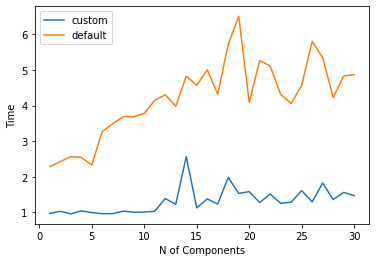

In [25]:
my_plot(test_cases, "pca_time", "N of Components", "Time")

Classifiers' **testing** time

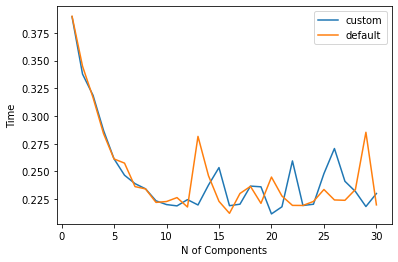

In [16]:
my_plot(test_cases, "testing_time", "N of Components", "Time")

Classifiers' **training** time

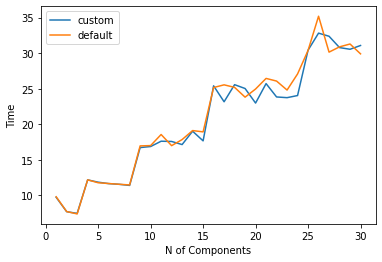

In [17]:
my_plot(test_cases, "training_time", "N of Components", "Time")

Classifiers' **accuracy**

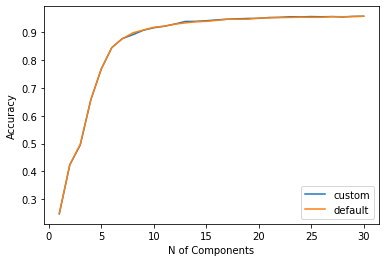

In [18]:
my_plot(test_cases, "accuracy", "N of Components", "Accuracy")

Classifiers' **Absolute Error**

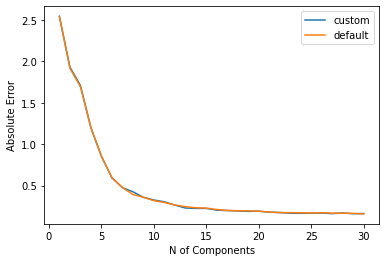

In [19]:
my_plot(test_cases, "abs_err", "N of Components", "Absolute Error")

Classifiers' **Mean Squred Error**

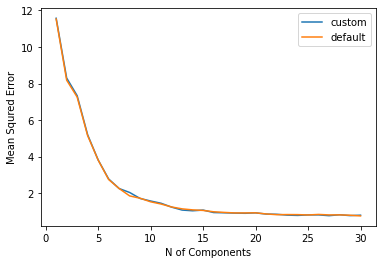

In [20]:
my_plot(test_cases, "mse_err", "N of Components", "Mean Squred Error")

Classifiers' **Root Mean Squred Error**

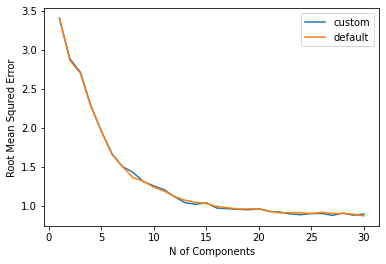

In [21]:
my_plot(test_cases, "rmse_err", "N of Components", "Root Mean Squred Error")

Training on **MNIST** testing on **Rocketbook** handwritten digits

In [22]:
forest_bench(mnist_train, handwritten_test)

Training time:            |  32.04544997215271
Testing time:             |  0.016204357147216797
Mean Absolute Error:      |  1.9609375
Mean Squared Error:       |  7.9921875
Root Mean Squared Error:  |  2.8270457194746603
Accuracy:                 |  0.3671875


Training on **Rocketbook** handwritten digits testing on **MNIST** train set

In [23]:
forest_bench(handwritten_test, mnist_train)

Training time:            |  0.16667842864990234
Testing time:             |  0.7496442794799805
Mean Absolute Error:      |  2.70588
Mean Squared Error:       |  13.18144
Root Mean Squared Error:  |  3.6306252904974925
Accuracy:                 |  0.28722


Training on **Rocketbook** handwritten digits testing on **MNIST** test set

In [24]:
forest_bench(handwritten_test, mnist_test)

Training time:            |  0.18263030052185059
Testing time:             |  0.15485644340515137
Mean Absolute Error:      |  2.8692
Mean Squared Error:       |  14.5286
Root Mean Squared Error:  |  3.8116400669528074
Accuracy:                 |  0.2924
